***Аналіз Даних (EDA)***

In [21]:
"""
Завантажити дані та провести їх первинний огляд.
"""

import pandas as pd

#Завантаження даних
file_path = '../data/raw/internet_service_churn.csv'
data = pd.read_csv(file_path)

#Первинний огляд даних
data_info = {
    "head": data.head(5),
    "info": data.info(),
    "missing_values": data.isnull().sum(),
    "shape": data.shape
}
data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   remaining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


{'head':    id  is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
 0  15                 1                            0             11.95   
 1  18                 0                            0              8.22   
 2  23                 1                            0              8.91   
 3  27                 0                            0              6.87   
 4  34                 0                            0              6.39   
 
    bill_avg  remaining_contract  service_failure_count  download_avg  \
 0        25                0.14                      0           8.4   
 1         0                 NaN                      0           0.0   
 2        16                0.00                      0          13.7   
 3        21                 NaN                      1           0.0   
 4         0                 NaN                      0           0.0   
 
    upload_avg  download_over_limit  churn  
 0         2.3                    0      0  
 1        

In [22]:
"""
Виявити відсутні значення, описати їх частоту.
"""

#Аналіз пропущених значень
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100 #формула для утворення процента
missing_report = pd.DataFrame({'Відсутні значення': missing_values, '% Пропусків': missing_percentage})
print("Пропущені значення:")
print(missing_report)


Пропущені значення:
                             Відсутні значення  % Пропусків
id                                           0     0.000000
is_tv_subscriber                             0     0.000000
is_movie_package_subscriber                  0     0.000000
subscription_age                             0     0.000000
bill_avg                                     0     0.000000
remaining_contract                       21572    29.847525
service_failure_count                        0     0.000000
download_avg                               381     0.527161
upload_avg                                 381     0.527161
download_over_limit                          0     0.000000
churn                                        0     0.000000


/home/kagev/.cache/pypoetry/virtualenvs/customer-outflow-dzA22ZuN-py3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kagev/.cache/pypoetry/virtualenvs/customer-outflow-dzA22ZuN-py3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kagev/.cache/pypoetry/virtualenvs/customer-outflow-dzA22ZuN-py3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kagev/.cache/pypoet

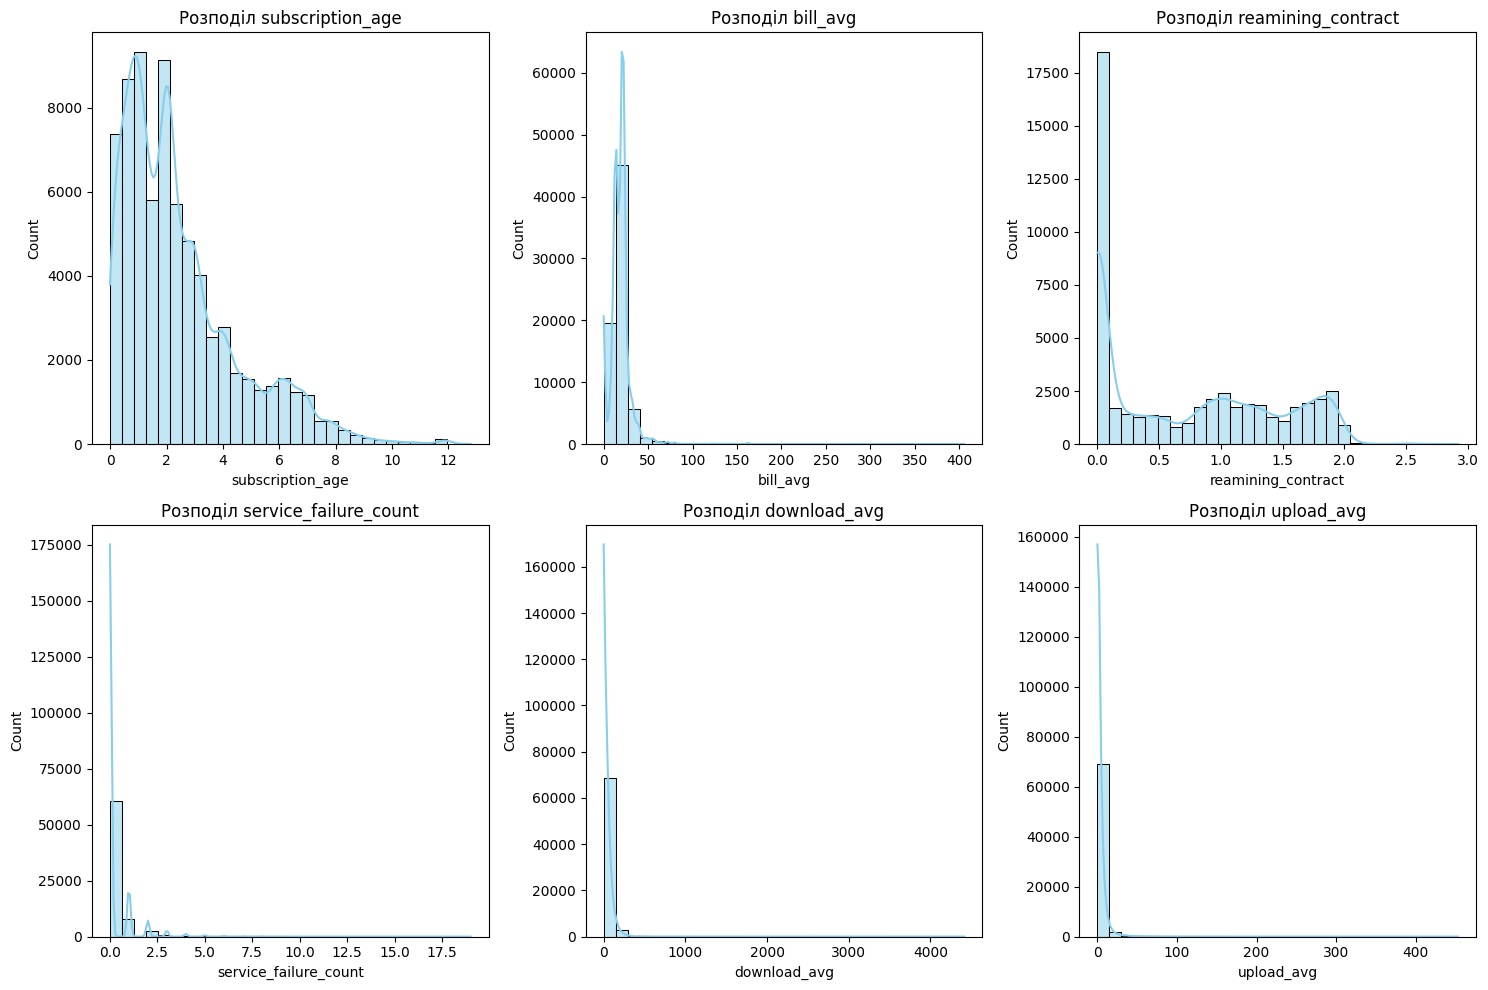

<Figure size 640x480 with 0 Axes>

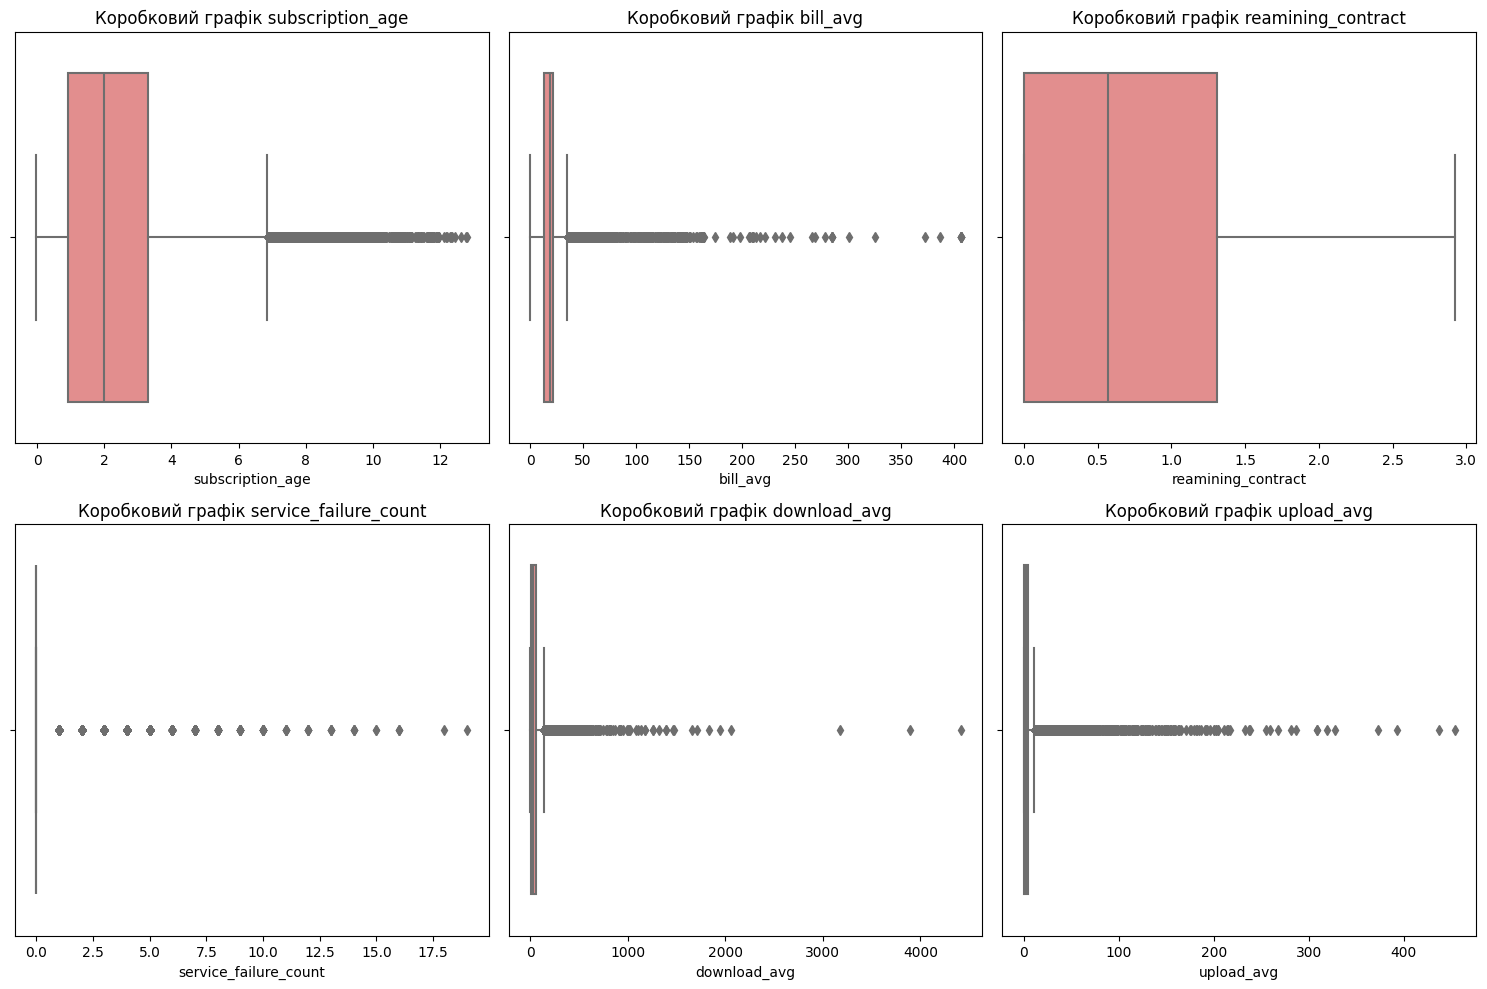

<Figure size 640x480 with 0 Axes>

In [23]:
"""
Вивчити розподіли даних (гістограми, коробкові графіки).
"""

import matplotlib.pyplot as plt
import seaborn as sns

#Список числових змінних
numeric_columns = ['subscription_age', 'bill_avg', 'remaining_contract',
                   'service_failure_count', 'download_avg', 'upload_avg']

#Гістограми
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Розподіл {column}')
plt.tight_layout()
plt.show()
plt.savefig('histograms.png') #ФАЙЛ ІЗ ГІСТОГРАМОЮ

#Коробкові графіки
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[column], color='lightcoral')
    plt.title(f'Коробковий графік {column}')
plt.tight_layout()
plt.show()
plt.savefig('boxplots.png') #ФАЙЛ ІЗ КОРОБКОВИМ ГРАФІКОМ

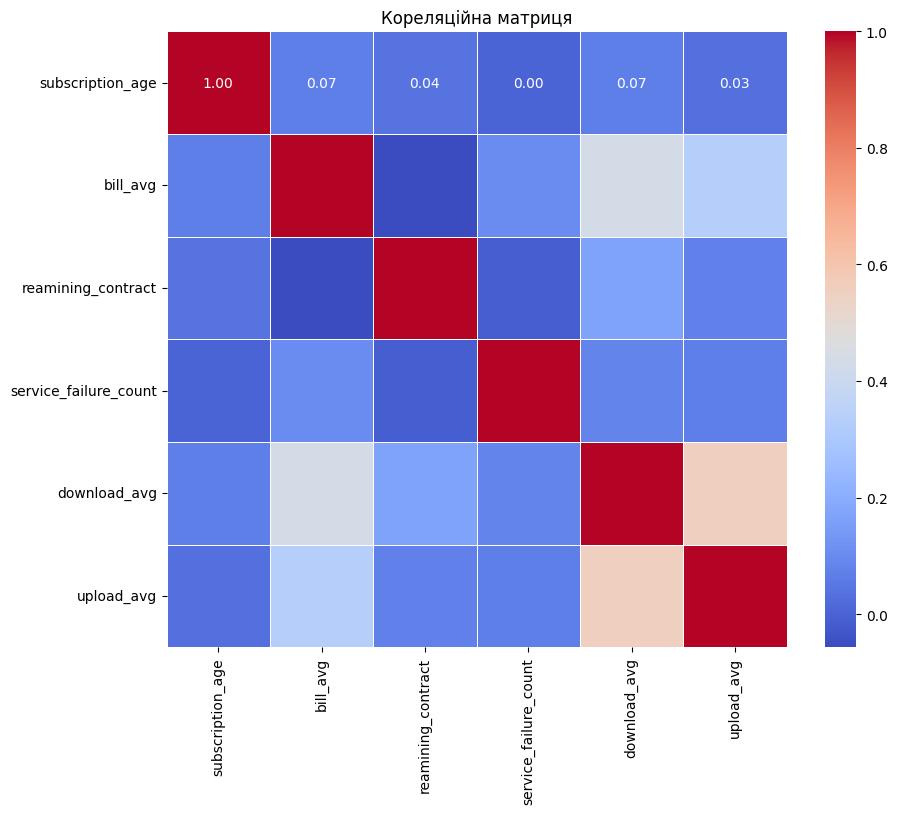

"\nНайбільш значущі зв’язки спостерігаються між download_avg, upload_avg і bill_avg.\nЦі змінні можуть бути корисними у прогнозуванні поведінки клієнтів або аналізі відтоку.\nІнші змінні мають слабкий взаємозв'язок, що може свідчити про їхню незалежність і потребу в інших методах аналізу.\n"

<Figure size 640x480 with 0 Axes>

In [24]:
"""
Аналіз кореляцій між змінними.
"""

#Кореляційна матриця
correlation_matrix = data[numeric_columns].corr()

#Візуалізація
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Кореляційна матриця")
plt.show()
plt.savefig('correlation_matrix.png')



"""
Найбільш значущі зв’язки спостерігаються між download_avg, upload_avg і bill_avg.
Ці змінні можуть бути корисними у прогнозуванні поведінки клієнтів або аналізі відтоку.
Інші змінні мають слабкий взаємозв'язок, що може свідчити про їхню незалежність і потребу в інших методах аналізу.
"""

In [25]:
"""
Створити підсумковий звіт із візуалізаціями.
"""

#Функція для збереження репорту у файлі
def save_report_to_file(filename, report_lines):
    with open(filename, "w", encoding="utf-8") as file:
        for line in report_lines:
            file.write(line + "\n")
    print(f"Звіт збережено у файл {filename}")

report_lines = []

#Пропущені значення
missing_summary = {
    "remaining_contract": "має майже 30% пропусків, що може впливати на точність аналізу.",
    "bill_avg": "мінімальна кількість пропусків (~2%)."
}
missing_recommendations = {
    "remaining_contract": "Імпутувати середнім або медіаною, або видалити записи з пропусками, якщо вони не впливають на результати.",
    "bill_avg": "Рекомендується медіанна імпутація, оскільки розподіл має нахил."
}

report_lines.append("1. Пропущені значення")
report_lines.append(f"Змінні з пропусками: {missing_summary}")
report_lines.append(f"Рекомендації: {missing_recommendations}\n")

#Візуалізації
visualizations = {
    "histograms.png": "Розподіли значень для кожної числової змінної. Наприклад, subscription_age має нормальний розподіл, тоді як bill_avg демонструє позитивний нахил.",
    "boxplots.png": "Виявлено кілька викидів, особливо у змінній remaining_contract, що може вказувати на специфічні групи клієнтів або аномалії.",
    "correlation_matrix.png": "Кореляційна матриця демонструє сильну позитивну кореляцію між download_avg та upload_avg (коефіцієнт = 0.55)."
}

report_lines.append("2. Візуалізації")
for file, description in visualizations.items():
    report_lines.append(f"{file}: {description}")
report_lines.append("")

#Основні висновки
key_findings = {
    "Пропуски": "Пропущені дані у змінній remaining_contract можуть суттєво вплинути на точність моделі. Рекомендується ретельно їх обробити.",
    "Розподіли": "Змінна bill_avg має позитивний нахил, виявлено викиди у remaining_contract.",
    "Кореляції": "Сильна кореляція між download_avg та upload_avg (0.55).",
    "Рівень відтоку": "Клієнти із тривалими контрактами мають менше шансів залишити компанію."
}

report_lines.append("3. Основні висновки")
for key, finding in key_findings.items():
    report_lines.append(f"{key}: {finding}")
report_lines.append("")

#Рекомендації
recommendations = {
    "Обробка пропусків": "Імпутувати пропуски у змінній remaining_contract за допомогою медіани або видалити записи.",
    "Оптимізація змінних": "Об’єднати змінні download_avg та upload_avg через високу кореляцію.",
    "Аналіз рівня відтоку": "Фокусувати увагу на клієнтах із помісячними контрактами та користувачах волоконно-оптичного інтернету.",
    "Подальший аналіз": "Розробити базову модель прогнозування відтоку, використовуючи ключові числові змінні (bill_avg, subscription_age)."
}

report_lines.append("4. Рекомендації")
for recommendation, action in recommendations.items():
    report_lines.append(f"{recommendation}: {action}")
report_lines.append("")

#Файли з візуалізаціями
visualization_files = ["../data/processed/histograms.png", "../data/processed/boxplots.png", "../data/processed/correlation_matrix.png"]
report_lines.append("5. Файли з візуалізаціями")
for file in visualization_files:
    report_lines.append(f"- {file}")
report_lines.append("")

#Збереження
save_report_to_file("../data/processed/summary_report.txt", report_lines)



Звіт збережено у файл ../data/processed/summary_report.txt
